In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv(r'D:\Project\SkillCraft_DataScience_Internship\SkillCraft_DataScience_Internship_03\SCT_DS_3\data\bank-full.csv',sep = ';')

In [28]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,college,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,high school,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,high school,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [18]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [17]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [ ]:
df['balance'] = df['balance'].astype(float) 


In [ ]:
 # Convert text to lowercase
df['education'] = df['education'].replace({"secondary": "high school", "tertiary": "college"})


In [25]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})


C:\Users\gaura\AppData\Local\Temp\ipykernel_13508\1086410804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['y'].map({'yes': 1, 'no': 0})


In [ ]:
df_encoded = pd.get_dummies(df.drop('y', axis=1), drop_first=True)
df_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143.0,5,261,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,44,29.0,5,151,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,33,2.0,5,76,1,-1,0,False,True,False,...,False,False,False,True,False,False,False,False,False,True
3,47,1506.0,5,92,1,-1,0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
4,33,1.0,5,198,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [31]:
from sklearn.model_selection import train_test_split

X = df_encoded
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


In [33]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


[[10835   843]
 [  869   746]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11678
           1       0.47      0.46      0.47      1615

    accuracy                           0.87     13293
   macro avg       0.70      0.69      0.70     13293
weighted avg       0.87      0.87      0.87     13293

Accuracy: 0.8712104114947716


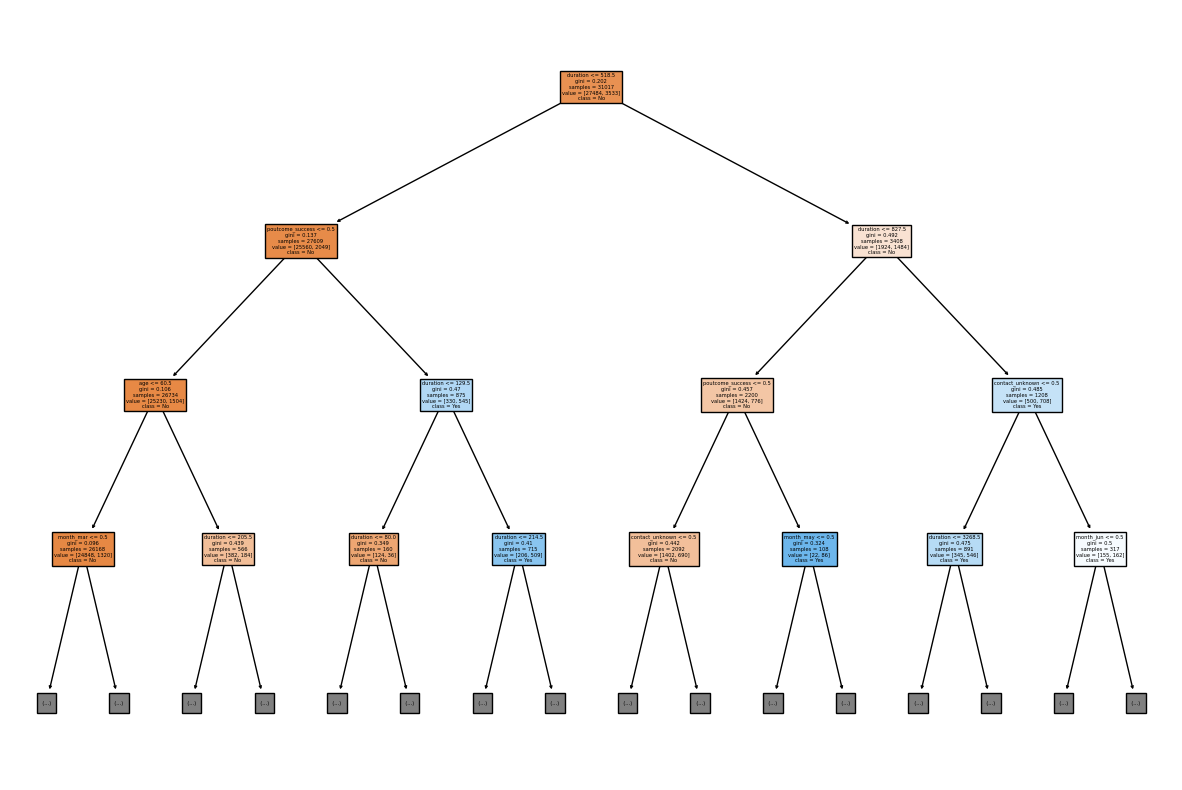

In [44]:
from sklearn.tree import plot_tree
import os

# Ensure the directory exists
os.makedirs("../assets", exist_ok=True)

plt.figure(figsize=(15,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], max_depth=3)
plt.savefig("../assets/decision_tree.png")
plt.show()
